# B.1 

In [1]:
# load required packages
import requests
import os
from dotenv import load_dotenv

In [2]:
# set up env
env_file = 'env_vars.env'
load_dotenv(env_file)
myAPIKey = os.getenv('ALPHAVANTAGE_KEY')
print(myAPIKey)

H9AM9ZPEU1GFMOVY


In [3]:
# define the url where the web service is
API_URL = "https://www.alphavantage.co/query"
symbols = ['AAPL', 'MSFT']

In [4]:
# get json from the alpha vantage
total = []
for symbol in symbols:
    data = {
        "function": "TIME_SERIES_INTRADAY",
        "symbol": symbol,
        "interval": "5min",
        "datatype": "json",
        "apikey": myAPIKey
             }
    response = requests.get(API_URL,  data)
    data = response.json()
    total.append(data)
    
data_stock1 = total[0]['Time Series (5min)']
data_stock2 = total[1]['Time Series (5min)']

In [6]:
type(data_stock1)


dict

In [7]:
total[1]['Time Series (5min)']

{'2021-05-06 20:00:00': {'1. open': '249.5500',
  '2. high': '249.5500',
  '3. low': '249.5500',
  '4. close': '249.5500',
  '5. volume': '353'},
 '2021-05-06 19:55:00': {'1. open': '249.4400',
  '2. high': '249.6700',
  '3. low': '249.4400',
  '4. close': '249.6700',
  '5. volume': '1353'},
 '2021-05-06 19:45:00': {'1. open': '249.7001',
  '2. high': '249.7001',
  '3. low': '249.4400',
  '4. close': '249.4900',
  '5. volume': '2311'},
 '2021-05-06 19:30:00': {'1. open': '249.6500',
  '2. high': '249.8400',
  '3. low': '249.6500',
  '4. close': '249.8400',
  '5. volume': '405'},
 '2021-05-06 19:20:00': {'1. open': '249.7900',
  '2. high': '249.7900',
  '3. low': '249.7900',
  '4. close': '249.7900',
  '5. volume': '200'},
 '2021-05-06 19:10:00': {'1. open': '249.6000',
  '2. high': '249.6000',
  '3. low': '249.6000',
  '4. close': '249.6000',
  '5. volume': '410'},
 '2021-05-06 19:05:00': {'1. open': '249.9200',
  '2. high': '249.9200',
  '3. low': '249.7300',
  '4. close': '249.7500',

# B.2  

In [11]:
import pandas as pd

df_stock1 = pd.DataFrame(data_stock1).transpose()
df_stock2 = pd.DataFrame(data_stock2).transpose()
df_stock1.index = pd.to_datetime(df_stock1.index)
df_stock2.index = pd.to_datetime(df_stock2.index)


,1. open,2. high,3. low,4. close,5. volume
2021-05-06 20:00:00,129.9500,130.0500,129.9300,130.0500,21250
2021-05-06 19:55:00,129.9200,129.9500,129.8900,129.9500,15048
2021-05-06 19:50:00,129.9300,129.9300,129.9100,129.9300,6940
2021-05-06 19:45:00,129.9500,129.9500,129.9000,129.9100,14300
2021-05-06 19:40:00,129.9600,129.9600,129.9300,129.9500,9934
...,...,...,...,...,...
2021-05-06 12:05:00,128.7300,128.7700,128.6000,128.7400,684469
2021-05-06 12:00:00,128.7000,128.9500,128.6950,128.7250,827790
2021-05-06 11:55:00,128.8300,128.9150,128.7000,128.7000,1180474
2021-05-06 11:50:00,128.9900,129.0100,128.8154,128.8201,897838


In [15]:
# consolidate the data into a pandas dataframe
# convert json to df
# reset index to datetime
import pandas as pd

df_stock1 = pd.DataFrame(data_stock1).transpose()
df_stock2 = pd.DataFrame(data_stock2).transpose()
df_stock1.index = pd.to_datetime(df_stock1.index)
df_stock2.index = pd.to_datetime(df_stock2.index)

# covert str to numeric
df_stock1['4. close'] = df_stock1['4. close'].astype('float')
df_stock2['4. close'] = df_stock2['4. close'].astype('float')

In [18]:
df_stock1.dtypes

1. open       object
2. high       object
3. low        object
4. close     float64
5. volume     object
dtype: object

In [20]:
# display 1st stock data
df_stock1.head(3)

,1. open,2. high,3. low,4. close,5. volume
2021-05-06 20:00:00,129.9500,130.0500,129.9300,130.05,21250
2021-05-06 19:55:00,129.9200,129.9500,129.8900,129.95,15048
2021-05-06 19:50:00,129.9300,129.9300,129.9100,129.93,6940


In [21]:
# display 2nd stock data
df_stock2.head(3)

,1. open,2. high,3. low,4. close,5. volume
2021-05-06 20:00:00,249.5500,249.5500,249.5500,249.55,353
2021-05-06 19:55:00,249.4400,249.6700,249.4400,249.67,1353
2021-05-06 19:45:00,249.7001,249.7001,249.4400,249.49,2311


#  B.3

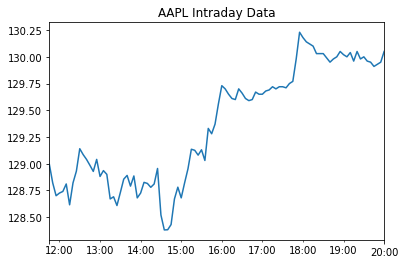

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt 

plt.title(symbols[0] + " Intraday Data")
df_stock1['4. close'].plot()

# B.4 

In [30]:
# calculate the return
stock1_return = df_stock1['4. close'].pct_change()
stock2_return = df_stock2['4. close'].pct_change()

In [33]:
# calculate correlation
corr = stock1_return.corr(stock2_return)
print("The correlation between 5min returns: % .2f"%(corr))

The correlation between 5min returns:  0.68
